In [1]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/BT4222/Data_3 (TF-IDF + Most_Listings_Features + SVD).csv',index_col=0)

In [5]:
df.columns

Index(['reviewer_id', 'preference', 'listing_id', 'host_is_superhost',
       'latitude', 'longitude', 'price', 'number_of_reviews_ltm',
       'calculated_host_listings_count', 'nearby_sites_rating',
       ...
       'Air conditioning', 'Kitchen', 'Parking', 'Outdoor', 'Kids',
       'Pets allowed', 'Workspace', 'Gym', 'Breakfast',
       'availability_average'],
      dtype='object', length=185)

In [6]:
y = df.preference

In [8]:
X = df.drop(columns=["reviewer_id","listing_id"])

In [9]:
X.drop(columns=["preference"],inplace=True)

In [10]:
X.head()

,host_is_superhost,latitude,longitude,price,number_of_reviews_ltm,calculated_host_listings_count,nearby_sites_rating,nearest_station_dist,host_response_time_cross_rate,item_factor_0,user_factor_0,item_factor_1,user_factor_1,item_factor_2,user_factor_2,item_factor_3,user_factor_3,item_factor_4,user_factor_4,item_factor_5,user_factor_5,item_factor_6,user_factor_6,item_factor_7,user_factor_7,item_factor_8,user_factor_8,item_factor_9,user_factor_9,text_factor_0,text_factor_1,text_factor_2,text_factor_3,text_factor_4,text_factor_5,text_factor_6,text_factor_7,text_factor_8,text_factor_9,text_factor_10,...,offline_government_id,selfie,government_id,identity_manual,work_email,manual_online,manual_offline,x0_Central Region,x0_East Region,x0_North Region,x0_North-East Region,x0_West Region,x0_apartment,x0_bed and breakfast,x0_boat,x0_boutique hotel,x0_bungalow,x0_condominium,x0_guest suite,x0_hostel,x0_hotel,x0_house,x0_loft,x0_other,x0_townhouse,x0_Entire home/apt,x0_Hotel room,x0_Private room,x0_Shared room,Wifi,Air conditioning,Kitchen,Parking,Outdoor,Kids,Pets allowed,Workspace,Gym,Breakfast,availability_average
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1.44255,103.79580,79.0,0,2,0.995731,0.617762,2.0,-0.080090,-0.045423,-0.072907,0.119669,0.077274,0.045258,0.037663,0.085235,-0.038879,0.009194,0.038809,-0.038233,0.030629,-0.072737,0.032604,0.082893,0.287333,-0.098187,0.089866,0.021846,0.142089,0.000000,0.018916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0,0,0,0,0,0,0,0,1.0
1,0,1.33235,103.78521,80.0,0,1,1.269606,0.399696,0.0,0.081554,-0.049855,-0.105953,0.044933,-0.116901,0.131527,-0.017028,0.111009,-0.086785,-0.002848,-0.020847,0.074678,-0.037473,-0.052219,-0.075626,-0.012367,0.034406,0.001945,0.085947,0.008726,0.000000,0.092355,0.046490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,0,0,0,0,1,0,1.0
2,0,1.33235,103.78521,80.0,0,1,1.269606,0.399696,0.0,0.081554,-0.045758,-0.105953,-0.057649,-0.116901,-0.014033,-0.017028,0.041884,-0.086785,0.181634,-0.020847,-0.046492,-0.037473,-0.133720,-0.075626,-0.118024,0.034406,0.067946,0.085947,-0.158080,0.000000,0.092355,0.046490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,0,0,0,0,1,0,1.0
3,0,1.33235,103.78521,80.0,0,1,1.269606,0.399696,0.0,0.081554,0.028973,-0.105953,0.145273,-0.116901,0.066612,-0.017028,-0.063751,-0.086785,0.176873,-0.020847,-0.142651,-0.037473,0.024285,-0.075626,0.007321,0.034406,0.025454,0.085947,0.055499,0.000000,0.092355,0.046490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,0,0,0,0,1,0,1.0
4,0,1.33235,103.78521,80.0,0,1,1.269606,0.399696,0.0,0.081554,-0.055366,-0.105953,-0.037461,-0.116901,0.030717,-0.017028,0.059124,-0.086785,0.139225,-0.020847,0.046353,-0.037473,-0.032285,-0.075626,-0.020036,0.034406,0.008693,0.085947,-0.050897,0.000000,0.092355,0.046490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,0,0,0,0,1,0,1.0


In [11]:
y = df.preference

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [14]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
def mse(y_predicted, y_true):
    return np.mean(np.square(y_predicted - y_true))
mse_training = mse(lr.predict(X_train), y_train)
mse_testing = mse(lr.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.022576769346112725, testing mse: 0.022626744374977897
training rmse: 0.15025567991298275, testing rmse: 0.15042188795178013


# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [17]:
forest = RandomForestRegressor(random_state = 1, n_estimators = 10, min_samples_split = 2)
params = {
            'max_depth': [5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }

rf = GridSearchCV(forest, params, cv = 3, verbose = 1, n_jobs = -1)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 25.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [18]:
print('best parameters: ', rf.best_params_)

best parameters:  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [19]:
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)
mse_training = mse(rf.predict(X_train), y_train)
mse_testing = mse(rf.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.01950028274105633, testing mse: 0.021555223090815288
training rmse: 0.1396434128093994, testing rmse: 0.14681697139913794


In [34]:
rf.best_estimator_.feature_importances_

array([2.13766235e-01, 1.10015608e-02, 1.05019963e-02, 1.99468659e-02,
       3.92032138e-03, 5.59328221e-02, 5.39500259e-03, 7.69100237e-03,
       2.66052812e-03, 5.01708309e-03, 1.33077842e-02, 4.79709355e-03,
       1.70029634e-02, 4.76295392e-03, 1.32177802e-02, 5.50835833e-03,
       1.62110258e-02, 5.32142721e-03, 1.52839917e-02, 5.27297507e-03,
       1.43431430e-02, 5.25422585e-03, 1.52271534e-02, 4.34937545e-03,
       2.02419634e-02, 4.13117027e-03, 1.45100241e-02, 4.93471152e-03,
       1.87456186e-02, 3.12751257e-03, 3.12002304e-03, 2.66247176e-02,
       1.01353767e-02, 1.68122398e-03, 2.83912847e-03, 2.56849062e-03,
       7.83239102e-03, 1.07781242e-03, 1.58365656e-03, 2.55451874e-03,
       2.69033486e-04, 2.45876256e-03, 4.27560795e-03, 2.56537783e-04,
       2.43976678e-03, 6.38362574e-03, 7.08519396e-03, 3.90583521e-03,
       1.49007454e-03, 1.77392872e-03, 2.86726821e-03, 2.12597966e-04,
       1.39284197e-03, 5.00674567e-04, 1.53771770e-03, 3.07363668e-03,
      

In [36]:
X_train.columns

Index(['host_is_superhost', 'latitude', 'longitude', 'price',
       'number_of_reviews_ltm', 'calculated_host_listings_count',
       'nearby_sites_rating', 'nearest_station_dist',
       'host_response_time_cross_rate', 'item_factor_0',
       ...
       'Air conditioning', 'Kitchen', 'Parking', 'Outdoor', 'Kids',
       'Pets allowed', 'Workspace', 'Gym', 'Breakfast',
       'availability_average'],
      dtype='object', length=182)

<BarContainer object of 182 artists>

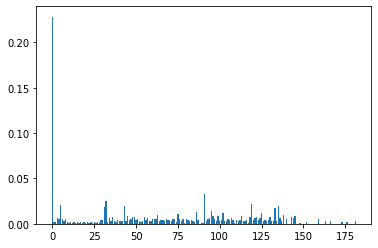

In [35]:
from matplotlib import pyplot
pyplot.bar(range(len(xgb_grid.best_estimator_.feature_importances_)), xgb_grid.best_estimator_.feature_importances_)

# XGBRegressor

In [20]:
from xgboost import XGBRegressor

In [21]:
import xgboost; print(xgboost.__version__)

0.90


In [22]:
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:linear','reg:squarederror'],
              'learning_rate': [.03, 0.05], #so called `eta` value
              'max_depth': [5, 6, 7],
              'n_estimators': [10,20]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  48 out of  48 | elapsed:  5.1min finished


[13:36:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'learning_rate': [0.03, 0.05], 'max_depth': [5, 6, 7],
                         'n_estimators': [10, 20],
    

In [23]:
y_train_pred = xgb_grid.predict(X_train)
y_pred = xgb_grid.predict(X_test)
mse_training = mse(xgb_grid.predict(X_train), y_train)
mse_testing = mse(xgb_grid.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.03551661283704807, testing mse: 0.03616320331013746
training rmse: 0.1884585175497464, testing rmse: 0.19016625176444285


In [32]:
xgb_grid.best_estimator_.feature_importances_

array([0.22828697, 0.00187701, 0.00251226, 0.00679967, 0.00511378,
       0.02065158, 0.00543081, 0.00264368, 0.0049209 , 0.00175734,
       0.00055749, 0.00152031, 0.00077045, 0.00232625, 0.0009592 ,
       0.00170078, 0.00102468, 0.00201   , 0.00101537, 0.00211271,
       0.00083602, 0.00224641, 0.00064827, 0.00174536, 0.0011071 ,
       0.00252138, 0.00099757, 0.00202241, 0.00097262, 0.00414654,
       0.00466354, 0.0180527 , 0.02557775, 0.0020464 , 0.00605321,
       0.00258771, 0.00797537, 0.00312383, 0.00200144, 0.00371426,
       0.00350115, 0.00291432, 0.00278772, 0.01907665, 0.00361838,
       0.00823262, 0.00398448, 0.00531929, 0.00722994, 0.007097  ,
       0.00452974, 0.00513093, 0.00322059, 0.00168837, 0.00354893,
       0.007467  , 0.00365387, 0.00639059, 0.00279601, 0.00342859,
       0.0055362 , 0.00495944, 0.00579839, 0.00995577, 0.00352485,
       0.004191  , 0.00381263, 0.00267626, 0.00540356, 0.00440462,
       0.00447697, 0.00295445, 0.00492267, 0.00506984, 0.00215

In [30]:
X_train.columns

Index(['host_is_superhost', 'latitude', 'longitude', 'price',
       'number_of_reviews_ltm', 'calculated_host_listings_count',
       'nearby_sites_rating', 'nearest_station_dist',
       'host_response_time_cross_rate', 'item_factor_0',
       ...
       'Air conditioning', 'Kitchen', 'Parking', 'Outdoor', 'Kids',
       'Pets allowed', 'Workspace', 'Gym', 'Breakfast',
       'availability_average'],
      dtype='object', length=182)

<BarContainer object of 182 artists>

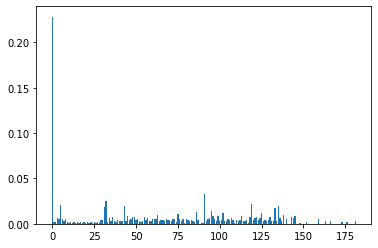

In [33]:
from matplotlib import pyplot
pyplot.bar(range(len(xgb_grid.best_estimator_.feature_importances_)), xgb_grid.best_estimator_.feature_importances_)